By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE
Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-07-09 11:52:39.467314: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


50/50 [==============================] - 1722s 33s/step


OpenCV: FFMPEG: tag 0x58564944/'DIVX' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


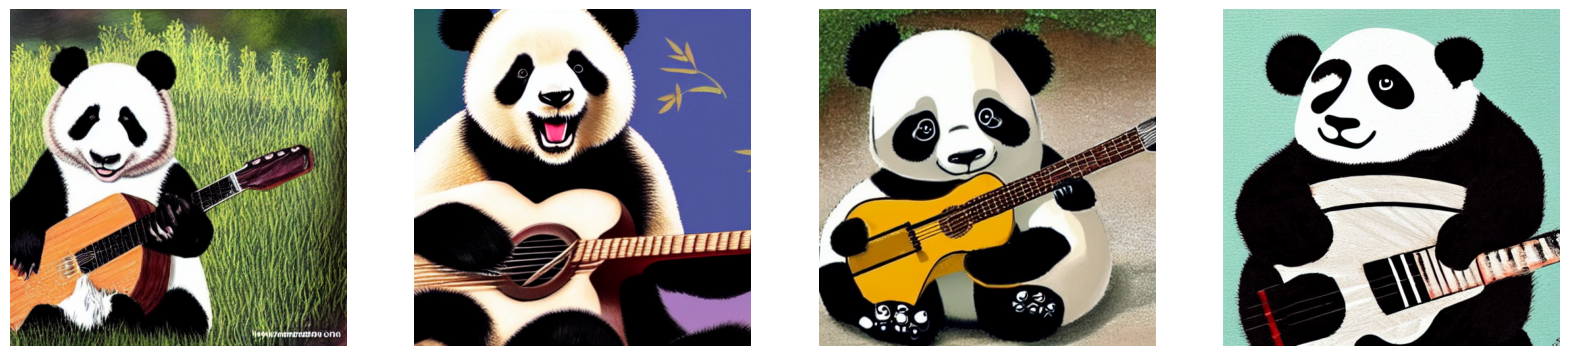

In [1]:
import time
from tensorflow import keras
import keras_cv
import matplotlib.pyplot as plt
import cv2

# Initialize the StableDiffusion model
model = keras_cv.models.StableDiffusion(img_width=512, img_height=512)

# Generate images from a text prompt
images = model.text_to_image("Panda Playing guitar", batch_size=4)

# Create a video writer to save the generated images as a video
video_writer = cv2.VideoWriter("video.mp4", cv2.VideoWriter_fourcc(*"DIVX"), 10, (512, 512))

# Write each generated image to the video
for image in images:
    # Repeat each frame for 20 times (2 seconds at 10 FPS)
    for _ in range(20):
        video_writer.write(image)

# Release the video writer
video_writer.release()

# Display the generated image
plt.figure(figsize=(20, 20))
for i in range(len(images)):
    ax = plt.subplot(1, len(images), i + 1)
    plt.imshow(images[i])
    plt.axis("off")

plt.show()